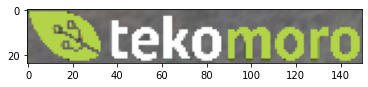

In [63]:

import cv2 

log_max_width = 150
car_max_width = 900       #i found that car picture is very large so i had resized it 
Margine       = 10 

car_img       = cv2.imread('carkyo.jpg')
log_img       = cv2.imread('tekomoro.png')

"resizing logo picture "
log_height,log_width,log_ch = log_img.shape
log_max_height = int((log_max_width*log_height)/log_width)    #Ratio must be reserved. :)
log_img=cv2.resize (log_img,(log_max_width ,log_max_height ))

"resizing car picture "
car_height,car_width,car_ch = car_img.shape
car_max_height = int((car_max_width*car_height)/car_width)   
car_img=cv2.resize (car_img,(car_max_width ,car_max_height ))


"getting the sub points "
y_1    = (car_max_height-(log_max_height+Margine))
y_2    = (car_max_height-Margine)
x_1    = (car_max_width-(log_max_width+Margine))
x_2    = (car_max_width-Margine)

"adjusting logo colour "

gray = cv2.cvtColor(log_img, cv2.COLOR_BGR2GRAY)                       #converting logo into gray scale 

ret, mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)       #inverting the logo colour to get words and shapes in black
  
mask_inv = cv2.bitwise_not(mask)                                      #inverting again logo colour to get words and shapes in white 


sub = car_img[y_1:y_2 , x_1:x_2]                                      #Trim logo place from car_img

img_bg = cv2.bitwise_and(sub, sub, mask=mask)                         #logo features appear in black over sub

img_fg = cv2.bitwise_and(log_img, log_img, mask=mask_inv)             #logo colour appear over white mask_inv



dst = cv2.add(img_bg, img_fg)                                         #adding both logo background black features and colours 
plt.imshow(dst[:,:,::-1]);



car_img[y_1:y_2 , x_1:x_2] = dst

cv2.imshow("Task1",car_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


#car_img.shape

